In [ ]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['superstore.xls']))

Saving superstore.xls to superstore (1).xls


In [ ]:
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [21]:
filtered_data=df[['Country','CustomerID']].drop_duplicates() #instead of drop duplicates, keep the pandas
#pandas 이용 먼저.
df.info()


KeyError: ignored

In [ ]:
df.describe()

,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df = df[(df['Quantity']>0)] #주문 안한 건수 제거
df['OrderDate'] = pd.to_datetime(df['OrderDate'],infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   datetime64[ns]
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9994 non-null   int64         
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  Sub-Category  9994 non-null   object  

In [ ]:
df=df[['CustomerID','OrderDate','OrderID','Quantity','Sales','Profit']]
PRESENT = dt.datetime(2017,12,31)#present check 할 것


In [ ]:
df_group=df.groupby('OrderDate').agg({'OrderDate': lambda date: -(PRESENT - date.max()).days,'CustomerID': lambda num: len(num),
                                        'OrderID': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'Sales': lambda price: price.sum(),'Profit': lambda price: price.sum()})

In [ ]:
df.head()

,CustomerID,OrderDate,OrderID,Quantity,Sales,Profit
0,CG-12520,2016-11-08,CA-2016-152156,2,261.9600,41.9136
1,CG-12520,2016-11-08,CA-2016-152156,3,731.9400,219.5820
2,DV-13045,2016-06-12,CA-2016-138688,2,14.6200,6.8714
3,SO-20335,2015-10-11,US-2015-108966,5,957.5775,-383.0310
4,SO-20335,2015-10-11,US-2015-108966,2,22.3680,2.5164


In [ ]:
df_group.columns=['Day Passed','customer/day','num_transactions','num_units','spent_money','Profit']
df_group.head(10000)

,Day Passed,customer/day,num_transactions,num_units,spent_money,Profit
OrderDate,,,,,,
2014-01-03,-1458,1,1,2,16.4480,5.5512
2014-01-04,-1457,3,3,8,288.0600,-65.9901
2014-01-05,-1456,1,1,3,19.5360,4.8840
2014-01-06,-1455,9,9,30,4407.1000,1358.0524
2014-01-07,-1454,2,2,10,87.1580,-71.9621
...,...,...,...,...,...,...
2017-12-26,-5,4,4,12,814.5940,61.1202
2017-12-27,-4,2,2,6,177.6360,-31.9742
2017-12-28,-3,19,19,64,1657.3508,253.1188


In [ ]:
df_group['avg_order_value']=df_group['spent_money']/df_group['num_transactions']


In [ ]:
df_group.head()

,Day Passed,customer/day,num_transactions,num_units,spent_money,Profit,avg_order_value
OrderDate,,,,,,,
2014-01-03,-1458,1,1,2,16.448,5.5512,16.448000
2014-01-04,-1457,3,3,8,288.060,-65.9901,96.020000
2014-01-05,-1456,1,1,3,19.536,4.8840,19.536000
2014-01-06,-1455,9,9,30,4407.100,1358.0524,489.677778
2014-01-07,-1454,2,2,10,87.158,-71.9621,43.579000


In [ ]:
purchase_frequency=sum(df_group['num_transactions'])/df_group.shape[0]
#리서치한 수식을 이용했습니다. ARPU(지금 코드에서는 daily basis로 계산 되어있습니다)
#각 날짜별로 유니크 주문 건수를 계산해서 이걸 전체 고객 수로 나누게 되면 전체 고객의 펑균 주문빈도가 나와요.
#이걸로 보게되면 모든 유저를 대상으로한 LTV계산이 가능할거라 생각했어요.

In [ ]:
repeat_rate=df_group[df_group.num_transactions > 1].shape[0]/df_group.shape[0]
churn_rate=1-repeat_rate #churn rate는 이탈율 이므로 1에서 repeat rate을 뺀 값.

In [ ]:
purchase_frequency,repeat_rate,churn_rate

(8.079223928860145, 0.9037995149555376, 0.09620048504446244)

In [ ]:
#LTV를 매출로 계산했을 때
df_group['LTV_S']=(df_group['spent_money']*purchase_frequency)/churn_rate

#LTV를 이익으로 계산했을 때
df_group['LTV_P']=(df_group['Profit']*purchase_frequency)/churn_rate


In [ ]:
df_group.head()


,Day Passed,customer/day,num_transactions,num_units,spent_money,Profit,avg_order_value,LTV_S,LTV_P
OrderDate,,,,,,,,,
2014-01-03,-1458,1,1,2,16.448,5.5512,16.448000,1381.355563,466.207503
2014-01-04,-1457,3,3,8,288.060,-65.9901,96.020000,24192.198655,-5542.059323
2014-01-05,-1456,1,1,3,19.536,4.8840,19.536000,1640.695664,410.173916
2014-01-06,-1455,9,9,30,4407.100,1358.0524,489.677778,370122.331092,114053.577190
2014-01-07,-1454,2,2,10,87.158,-71.9621,43.579000,7319.807160,-6043.606953


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f1e564a54d0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f1e564a5b10>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()


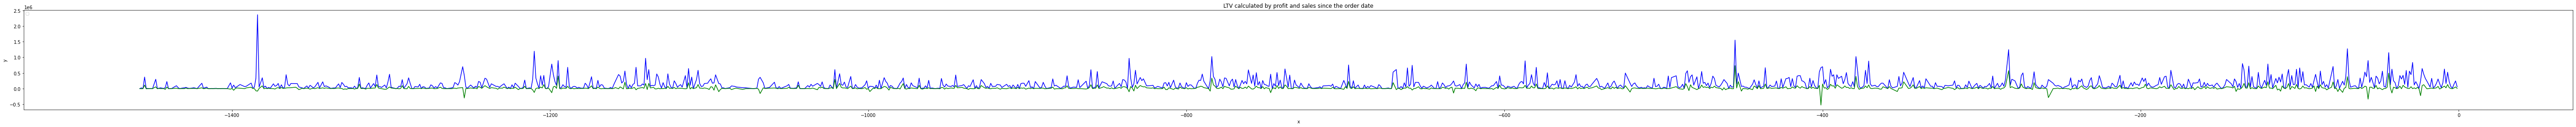

In [ ]:
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#df_group['OrderDate'] = pd.to_datetime(df_group['OrderDate'],infer_datetime_format=True)

time = df_group['Day Passed']
ltvs = df_group['LTV_S']
ltvp = df_group['LTV_P']
LTVS = plt.plot(time, ltvs, color ='b')
LTVP = plt.plot(time, ltvp, color ='g')
plt.legend((LTVS,LTVP),('LTV_S','LTV_P'),scatterpoints=1, loc='upper left', ncol=3, fontsize =8)
plt.title("LTV calculated by profit and sales since the order date")
plt.xlabel('x')
plt.ylabel('y')
fig = plt.gcf()
fig.set_figwidth(100)
ax=plt.gca()
ax.set_facecolor('w')
plt.show()

#창사이래로 부터 봐야하는가?
#날짜를 지정할 수 있는 윈도우 식으로 지정.
#제일 최근 OrderDate.max()를 찾아서 윈도우로 그룹핑 30씩. window function